## GraphState 클래스 생성

In [1]:
from typing import TypedDict
class GraphState(TypedDict):
    question: str  # 질문
    context: str  # 문서의 검색 결과
    answer: str  # 답변
    relevance: str  # 답변의 문서에 대한 관련성

### 노드 함수들

In [2]:
# 문서에서 검색하여 관련성 있는 문서를 찾습니다.
def retrieve_document(state: GraphState) -> GraphState:
    pass


# LLM을 사용하여 답변을 생성합니다.
def llm_answer(state: GraphState) -> GraphState:
    pass


def rewrite(state):
    pass


def search_on_web(state: GraphState) -> GraphState:
    pass


def relevance_check(state: GraphState) -> GraphState:
    pass


def is_relevant(state: GraphState) -> GraphState:
    pass

def question_checker(state: GraphState) -> GraphState:
    pass

def not_found_in_context(state: GraphState) -> GraphState:
    pass

## 랭그래프 로직 작성

In [4]:
from langgraph.graph import END, StateGraph
workflow = StateGraph(GraphState)

workflow.add_node("question_checker", question_checker)
workflow.add_node("retrieve", retrieve_document)
workflow.add_node("llm_answer", llm_answer)
workflow.add_node("relevance_check", relevance_check)
workflow.add_node("not_found_in_context", not_found_in_context)
workflow.add_node("rewrite", rewrite)


workflow.add_edge("retrieve", "llm_answer")
workflow.add_edge("llm_answer", "relevance_check")
workflow.add_edge("rewrite", "retrieve")

workflow.add_edge("not_found_in_context", END)

workflow.add_conditional_edges(
    "question_checker",
    is_relevant,
    {
        "grounded": "retrieve",
        "notGrounded": END,
    },
)


### Upstage groundeness checker 분기 ###
workflow.add_conditional_edges(
    "relevance_check",
    is_relevant,
    {
        "grounded": END,
        "notGrounded": "not_found_in_context",
        "notSure": "rewrite",
    },
)


workflow.set_entry_point("question_checker")

app = workflow.compile()

### 랭그래프 로직 머메이드로 그려보기

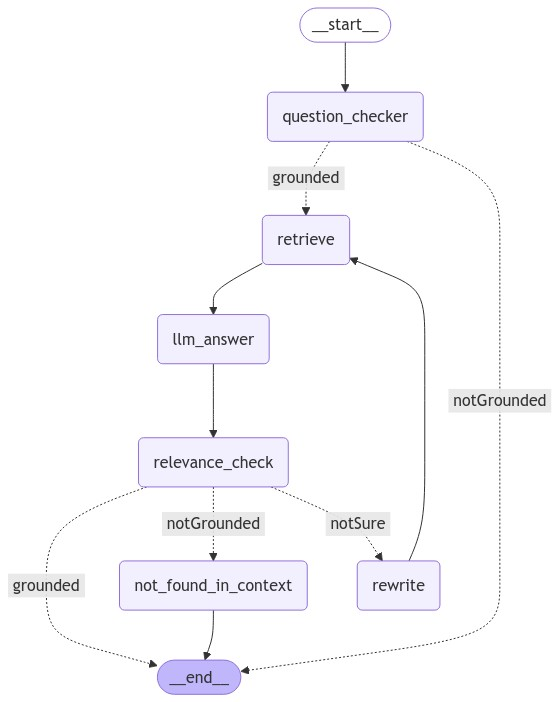

In [5]:
from IPython.display import Image, display

try:
    display(
        Image(app.get_graph(xray=True).draw_mermaid_png())
    )  # 실행 가능한 객체의 그래프를 mermaid 형식의 PNG로 그려서 표시합니다. xray=True는 추가적인 세부 정보를 포함합니다.
except:
    # 이 부분은 추가적인 의존성이 필요하며 선택적으로 실행됩니다.
    pass